In [30]:
import numpy as np
import itertools
import sklearn
import matplotlib

In [48]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_score, recall_score, f1_score, accuracy_score, RocCurveDisplay, auc

from xgboost import XGBClassifier

In [32]:
sklearn.__version__, matplotlib.__version__, np.__version__

('1.2.2', '3.7.1', '1.23.5')

In [33]:
# Let's use a resource of the sklearn library and generate a random n-class classification problem.
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_redundant=0,
    n_classes=2)

In [34]:
# Divinding between train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [35]:
# Instantiate the model to classifificaton:
classif = XGBClassifier()
# Trainng the model:
classif.fit(X_train,y_train)
# Making predictions:
y_pred = classif.predict(X_test)

Confusion Matrix:

In [36]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[1608,   75],
       [  87, 1530]])

Accuracy

In [37]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9509090909090909

Precision

In [38]:
precision = precision_score(y_test,y_pred,average='micro')
precision

0.9509090909090909

Recall / Sensibilidade

In [39]:
recall = recall_score(y_test,y_pred,average='micro')
recall

0.9509090909090909

F1 Score

In [53]:
f1_score = f1_score(y_test,y_pred)
f1_score

0.9497206703910613

# ROC Curve:

In [41]:
roc = roc_curve(y_test,y_pred)
roc

(array([0.        , 0.04456328, 1.        ]),
 array([0.        , 0.94619666, 1.        ]),
 array([2, 1, 0]))

We can determine the True Positive (TPR) and False Positive (FPR):

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Area under curve:

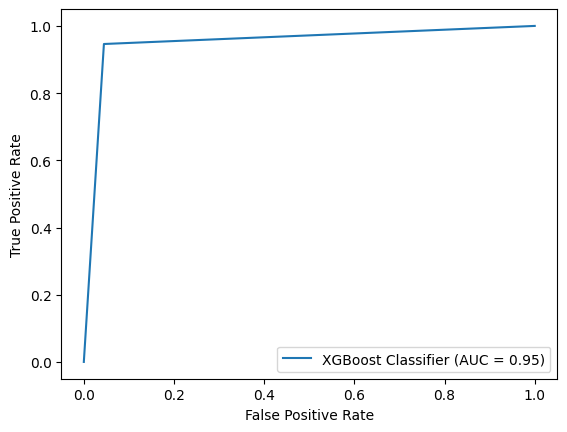

In [52]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBoost Classifier')
display.plot()
plt.show()